# Proyecto de predicciones para CS2

Importamos las librerías que utilizaremos

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Limpieza de datos

Cargamos los datos extraidos previamente con web scraping y la clase ``HltvScraper``.

In [157]:
data = "WebScraping/Data/"

df_matches = pd.read_csv(data + "matches_played_by_team.csv")
df_players = pd.read_csv(data + "players_stats.csv")
df_teams   = pd.read_csv(data + "teams_stats_by_map.csv")

Definimos la siguiente función que nos ayudará a limpiar los datos.

In [158]:
def dividir_columna(df: pd.DataFrame, column: str, sep: str, new_names: list) -> pd.DataFrame:
    position = df.columns.get_loc(column)
    columns_created = df.pop(column).str.split(sep, expand=True)
    columns_created.columns = new_names

    for i, col in enumerate(columns_created.columns):
        df.insert(position + i, col, columns_created[col])

    return df

## Limpieza de ``df_matches``

In [159]:
df_matches.head()

,Date,Event,Opponent,Map,Result,W/L,Group,Team
0,19/11/24,Perfect World Shanghai Major 2024 Europe RMR A,SAW,Ancient,13 - 2,W,europa_1,Natus Vincere
1,19/11/24,Perfect World Shanghai Major 2024 Europe RMR A,SAW,Nuke,13 - 10,W,europa_1,Natus Vincere
2,18/11/24,Perfect World Shanghai Major 2024 Europe RMR A,MOUZ,Inferno,7 - 13,L,europa_1,Natus Vincere
3,18/11/24,Perfect World Shanghai Major 2024 Europe RMR A,MOUZ,Dust2,8 - 13,L,europa_1,Natus Vincere
4,18/11/24,Perfect World Shanghai Major 2024 Europe RMR A,MOUZ,Mirage,13 - 4,W,europa_1,Natus Vincere


In [160]:
df_matches.dtypes

Date        object
Event       object
Opponent    object
Map         object
Result      object
W/L         object
Group       object
Team        object
dtype: object

In [161]:
df_matches = dividir_columna(df_matches, "Result", " - ", ["Rounds won", "Rounds lost"])

columns_to_int = ["Rounds won", "Rounds lost"]
columns_to_category = ["Map", "W/L", "Group", "Team"]

for col in columns_to_int:
    df_matches[col] = df_matches[col].astype(int)

for col in columns_to_category:
    df_matches[col] = df_matches[col].astype("category")

df_matches["Date"] = df_matches["Date"].astype("datetime64[ns]")

In [162]:
df_matches.isna().sum()

Date           0
Event          0
Opponent       0
Map            0
Rounds won     0
Rounds lost    0
W/L            0
Group          0
Team           0
dtype: int64

In [163]:
df_dups = df_matches[df_matches.duplicated(keep=False)]
df_dups

,Date,Event,Opponent,Map,Rounds won,Rounds lost,W/L,Group,Team


## Limpieza de ``df_players``

In [164]:
df_players.head()

,Kills,Deaths,Kill / Death,Kill / Round,Rounds with kills,Kill - Death difference,Total opening kills,Total opening deaths,Opening kill ratio,Opening kill rating,...,Rifle kills,Sniper kills,SMG kills,Pistol kills,Grenade,Other,Player,Group,Team,Map Name
0,392,473,0.83,0.54,296,-81,72,86,0.84,0.97,...,242,1,79,55,16,5,aleksib,europa_1,Natus Vincere,Ancient
1,509,490,1.04,0.70,338,19,101,108,0.94,1.12,...,401,6,10,86,4,3,im,europa_1,Natus Vincere,Ancient
2,529,450,1.18,0.73,361,79,74,45,1.64,1.07,...,419,2,22,84,3,1,b1t,europa_1,Natus Vincere,Ancient
3,540,454,1.19,0.75,355,86,75,60,1.25,1.05,...,437,5,23,72,3,2,jl,europa_1,Natus Vincere,Ancient
4,505,419,1.21,0.70,344,86,65,37,1.76,1.03,...,234,164,14,92,3,1,w0nderful,europa_1,Natus Vincere,Ancient


In [165]:
df_players.dtypes

Kills                                  int64
Deaths                                 int64
Kill / Death                         float64
Kill / Round                         float64
Rounds with kills                      int64
Kill - Death difference                int64
Total opening kills                    int64
Total opening deaths                   int64
Opening kill ratio                   float64
Opening kill rating                  float64
Team win percent after first kill     object
First kill in won rounds              object
0 kill rounds                          int64
1 kill rounds                          int64
2 kill rounds                          int64
3 kill rounds                          int64
4 kill rounds                          int64
5 kill rounds                          int64
Rifle kills                            int64
Sniper kills                           int64
SMG kills                              int64
Pistol kills                           int64
Grenade   

In [166]:
columns_to_float = ["Team win percent after first kill", "First kill in won rounds"]
columns_to_category = ["Player", "Group", "Team", "Map Name"]

for col in columns_to_float:
    df_players[col] = df_players[col].str.strip("%").astype(float)

for col in columns_to_category:
    df_players[col] = df_players[col].astype("category")

In [167]:
df_players.isna().sum()

Kills                                0
Deaths                               0
Kill / Death                         0
Kill / Round                         0
Rounds with kills                    0
Kill - Death difference              0
Total opening kills                  0
Total opening deaths                 0
Opening kill ratio                   0
Opening kill rating                  0
Team win percent after first kill    2
First kill in won rounds             0
0 kill rounds                        0
1 kill rounds                        0
2 kill rounds                        0
3 kill rounds                        0
4 kill rounds                        0
5 kill rounds                        0
Rifle kills                          0
Sniper kills                         0
SMG kills                            0
Pistol kills                         0
Grenade                              0
Other                                0
Player                               0
Group                    

In [168]:
df_dups = df_players.iloc[:, :-4]
df_dups = df_dups[df_dups.duplicated(keep=False)]
df_dups


,Kills,Deaths,Kill / Death,Kill / Round,Rounds with kills,Kill - Death difference,Total opening kills,Total opening deaths,Opening kill ratio,Opening kill rating,...,2 kill rounds,3 kill rounds,4 kill rounds,5 kill rounds,Rifle kills,Sniper kills,SMG kills,Pistol kills,Grenade,Other
5,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1841,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1865,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1867,0,0,0.0,0.0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df_players = df_players.drop(index=df_dups.index)

In [170]:
df_players.shape

(1786, 28)

## Limpieza de ``df_teams``

In [171]:
df_teams.head()

,Times played,Wins / draws / losses,Total rounds played,Rounds won,Win percent,Pistol rounds,Pistol rounds won,Pistol round win percent,CT round win percent,T round win percent,Group,Team,Map Name
0,34,22 / 0 / 12,724,390,64.7%,68,38,55.9%,55.1%,52.6%,europa_1,Natus Vincere,Ancient
1,0,0 / 0 / 0,0,0,0.0%,0,0,0.0%,0.0%,0.0%,europa_1,Vitality,Ancient
2,23,14 / 0 / 9,513,280,60.9%,46,28,60.9%,56.4%,52.9%,europa_1,MOUZ,Ancient
3,33,21 / 0 / 12,752,409,63.6%,66,40,60.6%,53.8%,54.9%,europa_1,FaZe,Ancient
4,22,8 / 0 / 14,479,224,36.4%,44,23,52.3%,50.4%,42.3%,europa_1,Falcons,Ancient


In [172]:
df_teams = dividir_columna(df_teams, "Wins / draws / losses", " / ", ["Wins", "Draws", "Losses"])

In [173]:
df_dups = df_teams.iloc[:, :-3]
df_dups = df_dups[df_dups.duplicated(keep=False)]
df_dups

,Times played,Wins,Draws,Losses,Total rounds played,Rounds won,Win percent,Pistol rounds,Pistol rounds won,Pistol round win percent,CT round win percent,T round win percent
1,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
58,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
77,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
103,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
183,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
185,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
194,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
213,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
222,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%
238,0,0,0,0,0,0,0.0%,0,0,0.0%,0.0%,0.0%


In [174]:
df_teams = df_teams.drop(index=df_dups.index)

In [175]:
df_teams.dtypes

Times played                 int64
Wins                        object
Draws                       object
Losses                      object
Total rounds played          int64
Rounds won                   int64
Win percent                 object
Pistol rounds                int64
Pistol rounds won            int64
Pistol round win percent    object
CT round win percent        object
T round win percent         object
Group                       object
Team                        object
Map Name                    object
dtype: object

In [176]:
columns_to_int = ["Wins", "Draws", "Losses"]
columns_to_float = ["Win percent", "Pistol round win percent", "CT round win percent", "T round win percent"]
columns_to_category = ["Group", "Team", "Map Name"]

for col in columns_to_int:
    df_teams[col] = df_teams[col].astype(int)

for col in columns_to_float:
    df_teams[col] = df_teams[col].str.strip("%").astype(float)

for col in columns_to_category:
    df_teams[col] = df_teams[col].astype("category")

## Visualización de los 3 DF

In [255]:
df_matches.head()

,Date,Event,Opponent,Map,Rounds won,Rounds lost,W/L,Group,Team
0,2024-11-19,Perfect World Shanghai Major 2024 Europe RMR A,SAW,Ancient,13,2,W,europa_1,Natus Vincere
1,2024-11-19,Perfect World Shanghai Major 2024 Europe RMR A,SAW,Nuke,13,10,W,europa_1,Natus Vincere
2,2024-11-18,Perfect World Shanghai Major 2024 Europe RMR A,MOUZ,Inferno,7,13,L,europa_1,Natus Vincere
3,2024-11-18,Perfect World Shanghai Major 2024 Europe RMR A,MOUZ,Dust2,8,13,L,europa_1,Natus Vincere
4,2024-11-18,Perfect World Shanghai Major 2024 Europe RMR A,MOUZ,Mirage,13,4,W,europa_1,Natus Vincere


In [256]:
df_players.head()

,Kills,Deaths,Kill / Death,Kill / Round,Rounds with kills,Kill - Death difference,Total opening kills,Total opening deaths,Opening kill ratio,Opening kill rating,...,Rifle kills,Sniper kills,SMG kills,Pistol kills,Grenade,Other,Player,Group,Team,Map Name
0,392,473,0.83,0.54,296,-81,72,86,0.84,0.97,...,242,1,79,55,16,5,aleksib,europa_1,Natus Vincere,Ancient
1,509,490,1.04,0.70,338,19,101,108,0.94,1.12,...,401,6,10,86,4,3,im,europa_1,Natus Vincere,Ancient
2,529,450,1.18,0.73,361,79,74,45,1.64,1.07,...,419,2,22,84,3,1,b1t,europa_1,Natus Vincere,Ancient
3,540,454,1.19,0.75,355,86,75,60,1.25,1.05,...,437,5,23,72,3,2,jl,europa_1,Natus Vincere,Ancient
4,505,419,1.21,0.70,344,86,65,37,1.76,1.03,...,234,164,14,92,3,1,w0nderful,europa_1,Natus Vincere,Ancient


In [258]:
df_teams.head()

,Times played,Wins,Draws,Losses,Total rounds played,Rounds won,Win percent,Pistol rounds,Pistol rounds won,Pistol round win percent,CT round win percent,T round win percent,Group,Team,Map Name
0,34,22,0,12,724,390,64.7,68,38,55.9,55.1,52.6,europa_1,Natus Vincere,Ancient
2,23,14,0,9,513,280,60.9,46,28,60.9,56.4,52.9,europa_1,MOUZ,Ancient
3,33,21,0,12,752,409,63.6,66,40,60.6,53.8,54.9,europa_1,FaZe,Ancient
4,22,8,0,14,479,224,36.4,44,23,52.3,50.4,42.3,europa_1,Falcons,Ancient
5,47,28,0,19,978,506,59.6,94,46,48.9,50.0,53.5,europa_1,BetBoom,Ancient


# 2. Exploración de datos (EDA)

## Win Percent y Player Stats

Queremos entender como se relacionan las estadísticas de los jugadores de un equipo en un cierto mapa, con el porcentaje de victorias en él. 

In [209]:
stats_win = pd.merge(df_players, df_teams[["Win percent", "Team", "Map Name"]], how="left", on=["Team", "Map Name"])

In [210]:
stats_win = stats_win.drop(["Player", "Group", "Team"], axis=1)

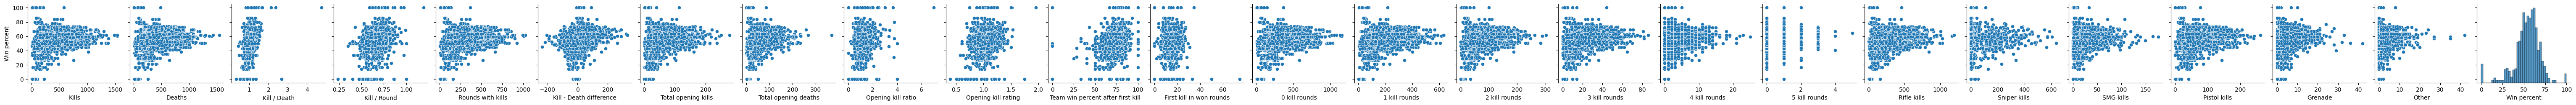

In [211]:
sns.pairplot(stats_win, y_vars="Win percent")

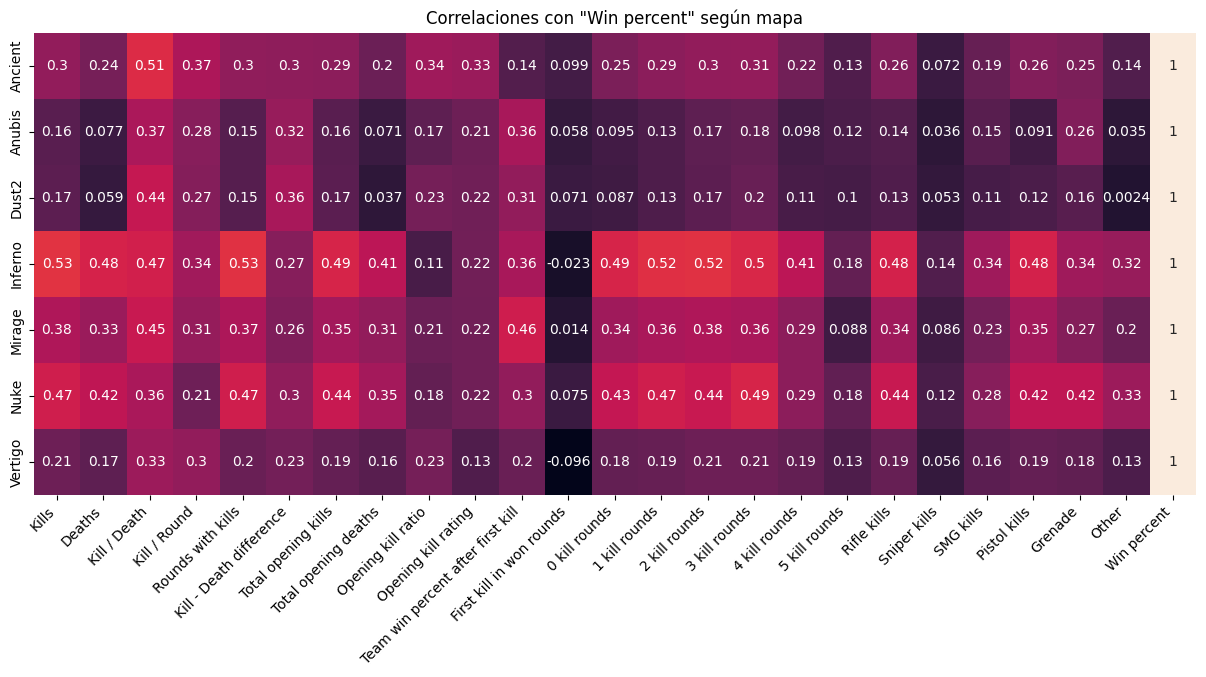

In [ ]:
maps = ['Ancient', 'Anubis', 'Dust2', 'Inferno', 'Mirage', 'Nuke', 'Vertigo']
variables = list(stats_win.columns)
variables.remove("Map Name")

corr = []
for map_name in maps:
    filtro = stats_win[stats_win["Map Name"] == map_name]
    corr_win = filtro.corr(numeric_only=True)["Win percent"]

    corr.append(list(corr_win))

corr_win_df = pd.DataFrame(corr, index = maps)
corr_win_df.columns = variables

corr_win_df

plt.figure(figsize=(15, 6))
sns.heatmap(corr_win_df, annot=True, cbar=False)
plt.title('Correlaciones con "Win percent" según mapa')

plt.xticks(rotation=45, ha='right')

plt.show()

Abrá algún cambio si filtramos ``Win percent`` a valores en (0, 100).

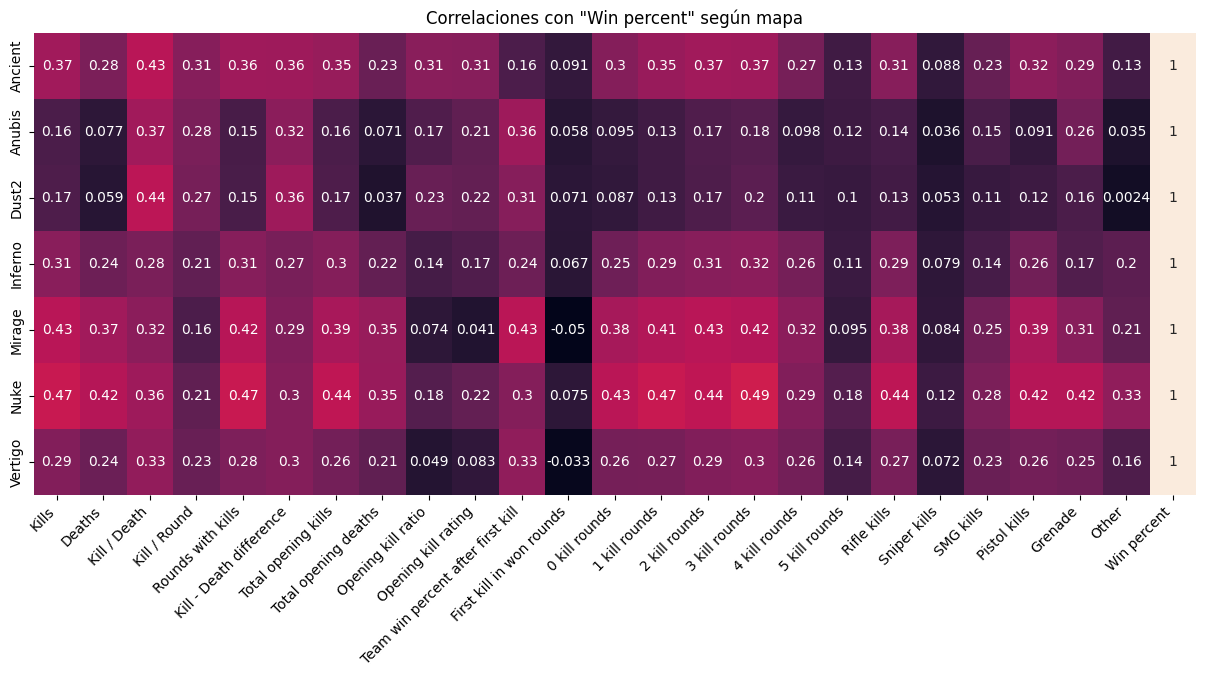

In [252]:
corr = []
for map_name in maps:
    filtro = stats_win[stats_win["Map Name"] == map_name]
    filtro = filtro[filtro["Win percent"] != 0]
    filtro = filtro[filtro["Win percent"] != 100]
    corr_win = filtro.corr(numeric_only=True)["Win percent"]

    corr.append(list(corr_win))

corr_win_df = pd.DataFrame(corr, index = maps)
corr_win_df.columns = variables

corr_win_df

plt.figure(figsize=(15, 6))
sns.heatmap(corr_win_df, annot=True, cbar=False)
plt.title('Correlaciones con "Win percent" según mapa')

plt.xticks(rotation=45, ha='right')

plt.show()

En los equipos, los jugadores tienen asignados diferentes roles. Uno de ellos es el "awper", caracterizado se el jugador que llega el arma "AWP" en las rondas. 

Definimos a un awper a aquellos jugadores con más de 150 Sniper kills. Veamos si hay algún cambio en las correlaciones, sobre todo en la variable ``Sniper kills``.

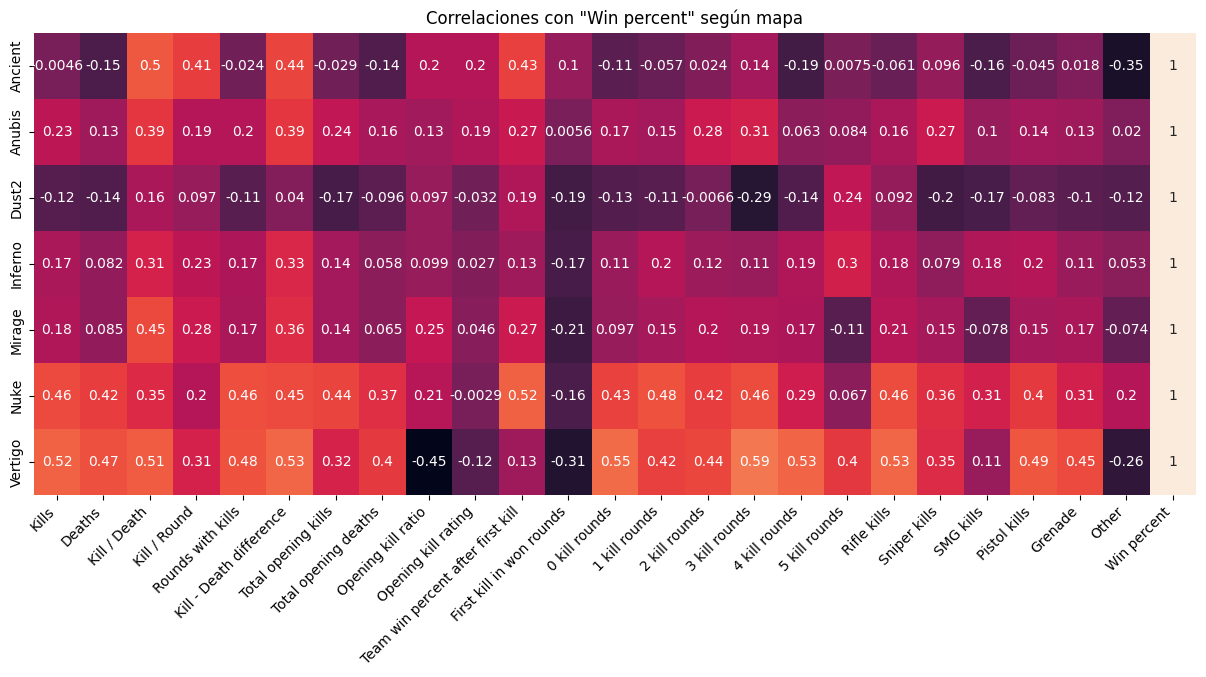

In [253]:
corr = []
for map_name in maps:
    filtro = stats_win[stats_win["Map Name"] == map_name]
    filtro = filtro[filtro["Sniper kills"] >= 150]
    corr_win = filtro.corr(numeric_only=True)["Win percent"]

    corr.append(list(corr_win))

corr_win_df = pd.DataFrame(corr, index = maps)
corr_win_df.columns = variables

corr_win_df

plt.figure(figsize=(15, 6))
sns.heatmap(corr_win_df, annot=True, cbar=False)
plt.title('Correlaciones con "Win percent" según mapa')

plt.xticks(rotation=45, ha='right')

plt.show()

# 3. Modelos de predicción

Dadas las observaciones vistas en el EDA, integraremos las stats de los jugadores a DataFrame ``df_teams``, de manera de tener los datos más representativos en de los jugadores de un equipo en todos los mapas.

Como nuestro objetivo es predecir quien ganará un enfrentamiento entre dos equipos, hay que entrenar un modelo que, al pasarle dos equipos, nos de la probabilidad de que un equipo le gane al otro para cada uno de los 7 mapas.

In [ ]:
# Entrenar diferentes modelos
    # Regresiones o clasificación

# Hacer cross validation

# Escoger el mejor

# 4. Ganador del Major

In [260]:
# Utilizar el modelo entrenado para decir quien ganará el Major